In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df_aluminium = pd.read_csv('dataset/' + '2005-2022-aluminium.csv')
df_copper = pd.read_csv('dataset/' + '2005-2022-copper.csv')
df_iron = pd.read_csv('dataset/' + '2010-2022-iron.csv')
df_palladium = pd.read_csv('dataset/' + '2005-2022-palladium.csv')
df_zinc = pd.read_csv('dataset/' + '2005-2022-zinc.csv')
df_lead = pd.read_csv('dataset/' + '2005-2022-lead.csv')
df_nickel = pd.read_csv('dataset/' + '2005-2022-nickel.csv')
df_platinum = pd.read_csv('dataset/' + '2005-2022-platinum_nymex.csv')
df_rhodium = pd.read_csv('dataset/' + '2005-2022-rhodium.csv')
df_tin = pd.read_csv('dataset/' + '2005-2022-tin.csv')
df_palladium_lbma = pd.read_csv('dataset/' + '2005-2022-palladium_lbma.csv')
df_platinum_lbma = pd.read_csv('dataset/' + '2005-2022-platinum_lbma.csv')
df_cobalt = pd.read_csv('dataset/' + '2010-2022-cobalt.csv')
df_rebar = pd.read_csv('dataset/' + '2009-2022-rebar_shfe.csv')
df_silver = pd.read_csv('dataset/' + '2005-2022-silver.csv')



dataset_all = [df_aluminium, df_copper, df_iron, df_palladium, df_zinc, df_lead, df_nickel, df_platinum, df_rhodium, df_tin, df_palladium_lbma, df_platinum_lbma, df_cobalt, df_rebar, df_silver]
name_all = ['aluminium', 'copper', 'iron', 'palladium', 'zinc', 'lead', 'nickel', 'platinum', 'rhodium', 'tin', 'palladium_lbma', 'platinum_lbma','cobalt', 'rebar', 'silver']

common_cols = set.intersection(*map(set,dataset_all))

for df in dataset_all:
    df.drop(df.columns.difference(common_cols), axis=1, inplace=True)
    if df.columns[0] != 'date' or df.columns[-1] !='y':
        print('something wrong')
    
print('data cleaned')
        

data cleaned


# all commodities correlation test 2005-2022 (expect iron, cobalt, rebar)

In [55]:
dataset_all = [df_aluminium, df_copper, df_palladium, df_zinc, df_lead, df_nickel, df_platinum, df_rhodium, df_tin, df_palladium_lbma, df_platinum_lbma,df_silver]
name_all = ['aluminium', 'copper', 'palladium', 'zinc', 'lead', 'nickel', 'platinum', 'rhodium', 'tin', 'palladium_lbma', 'platinum_lbma', 'silver']

target_all = {}
for df, name in zip(dataset_all,name_all):
    # df = df[df.date >= '2010-10-22'].reset_index(drop=True)
    target_all[name] = df['y']

df_target_all = pd.DataFrame(target_all)

In [56]:
correlations = df_target_all.corr()

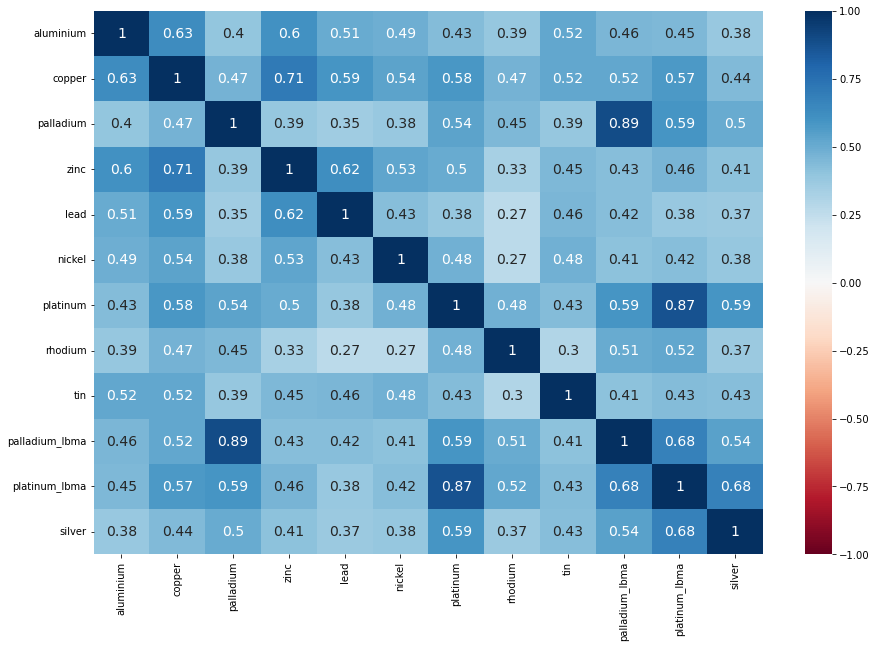

In [57]:
plt.figure(figsize=(15,10))

sns.heatmap(round(correlations,3), cmap='RdBu', annot=True, 
            annot_kws={"size": 14}, vmin=-1, vmax=1);

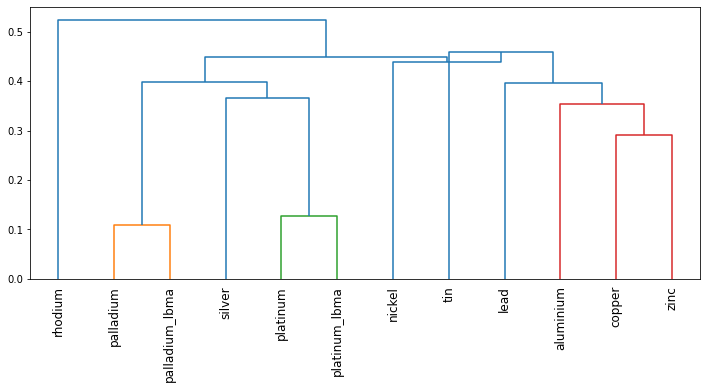

In [79]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'median')

dendrogram(Z, labels=df_target_all.columns, orientation='top', 
           leaf_rotation=90);